In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [101]:

from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [102]:
test_df = pd.read_excel(r'C:\Users\rashi\Downloads\Doctor_fee_consultation\Final _Participant _Data _Folder\Final_Test.xlsx')

In [103]:
train_df = pd.read_excel(r'C:\Users\rashi\Downloads\Doctor_fee_consultation\Final _Participant _Data _Folder\Final_Train.xlsx')

In [104]:
sub_df = pd.read_excel(r'C:\Users\rashi\Downloads\Doctor_fee_consultation\Final _Participant _Data _Folder\Sample_submission.xlsx')

In [105]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [106]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [107]:
sub_df.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


In [108]:
def show_all(df, nrow=None, ncol=None):
    with pd.option_context('display.max_rows', nrow, 'display.max_columns', ncol):
        display(df)

In [109]:
test_df.shape

(1987, 6)

there are 1987 rows and 6 columns

In [110]:
train_df.shape

(5961, 7)

there are 5961 rows and 7 columns in this dataset

In [111]:
sub_df.shape

(1987, 1)

there are 1987 rows and 1 column

In [112]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

there are 3 columns which have null values rating,place,miscellaneous info

In [113]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

there are columns which have null values rating,miscellaneous info

In [114]:
sub_df.isnull().sum()

Fees    0
dtype: int64

there is no null value in this dataset

In [115]:
train_df['Experience'] = train_df['Experience'].str[0:-17].astype(int)

In [116]:
test_df['Experience'] = test_df['Experience'].str[0:-17].astype(int)

we have change experience column data into int type

In [117]:
train_df['Rating'] = train_df['Rating'].str[0:-1].astype(float)


In [118]:
test_df['Rating'] = test_df['Rating'].str[0:-1].astype(float)

we have changed rating column data into float type

In [119]:
train_df['Place'].fillna('none, none', inplace=True)


In [120]:
test_df['Place'].fillna('none, none', inplace=True)

In [121]:
train_df['Area'] = train_df['Place'].str.rsplit(',', 1).str.get(0)
train_df['City'] = train_df['Place'].str.rsplit(',', 1).str.get(1)
test_df['Area'] = test_df['Place'].str.rsplit(',', 1).str.get(0)
test_df['City'] = test_df['Place'].str.split(',', 1).str.get(1)

we have clubbed area & city column in place column only as it is same as in place column

In [122]:
train_df['City'] = train_df['City'].str.strip()
test_df['City'] = test_df['City'].str.strip()

In [123]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [124]:
train_df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'none', nan],
      dtype=object)

there are 10 city where the doctor is located.

In [125]:
test_df['City'].unique()

array(['Mumbai', 'Hyderabad', 'Chennai', 'Delhi', 'Bangalore',
       'Coimbatore', 'Thiruvananthapuram', 'Ernakulam', 'none'],
      dtype=object)

there are 9 city where the doctor is located.

In [126]:
train_df[train_df['City'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
3980,BDS,23,NaN,e,Dentist,NaN,250,e,NaN


In [127]:
train_df.loc[train_df['City'].isnull(), 'Area'] = 'none'
train_df['City'] = train_df['City'].fillna('none')

In [128]:

train_df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'none'], dtype=object)

In [129]:

train_df['Area'].nunique()

867

In [130]:
test_df['Profile'].unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

In [131]:
train_df['Has_M_Info'] = (~train_df['Miscellaneous_Info'].isnull())
test_df['Has_M_Info'] = (~test_df['Miscellaneous_Info'].isnull())
train_df['Has_M_Info'] = train_df['Has_M_Info'].astype(int)
test_df['Has_M_Info'] = test_df['Has_M_Info'].astype(int)

In [132]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,Has_M_Info
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,1
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,1
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,1
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1


In [133]:
train_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'Area', 'City', 'Has_M_Info'],
      dtype='object')

# eda

<AxesSubplot:xlabel='Experience', ylabel='count'>

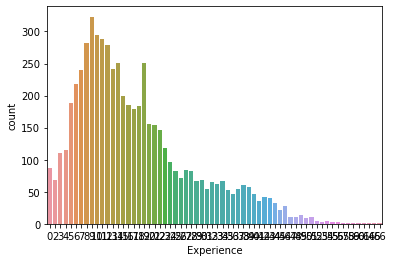

In [134]:
sns.countplot(x='Experience', data=train_df)

difficult to identify so we'll try something else

<AxesSubplot:xlabel='Place', ylabel='count'>

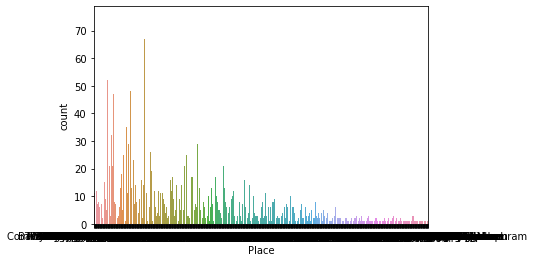

In [135]:
sns.countplot(x='Place', data=train_df)

<AxesSubplot:xlabel='Fees', ylabel='count'>

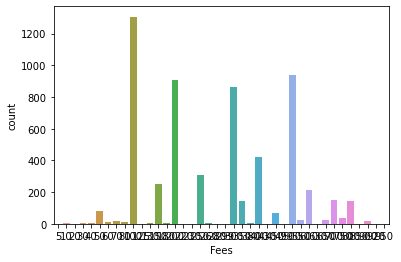

In [136]:
sns.countplot(x='Fees', data=train_df)

In [137]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Area,City,Has_M_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Ghatkopar East,Mumbai,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,West Marredpally,Hyderabad,0
2,"MBBS, DDVL",40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai,1
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,New Ashok Nagar,Delhi,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore,1


<AxesSubplot:xlabel='Experience', ylabel='count'>

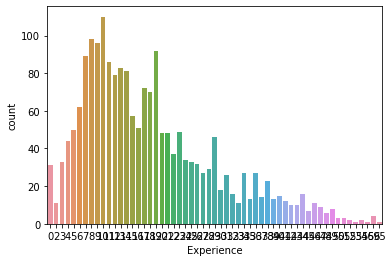

In [138]:
sns.countplot(x='Experience', data=test_df)

<AxesSubplot:xlabel='Place', ylabel='count'>

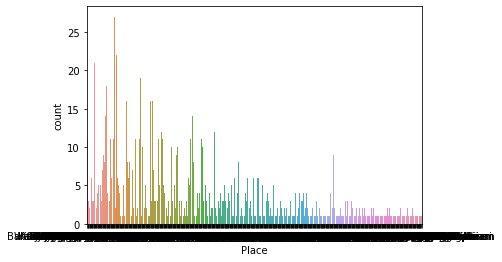

In [139]:
sns.countplot(x='Place', data=test_df)

<AxesSubplot:xlabel='Fees', ylabel='count'>

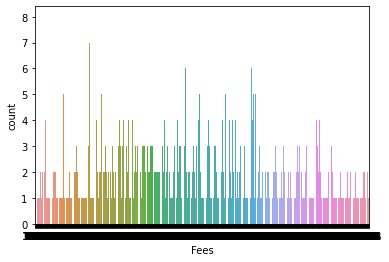

In [140]:
sns.countplot(x='Fees', data=sub_df)

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

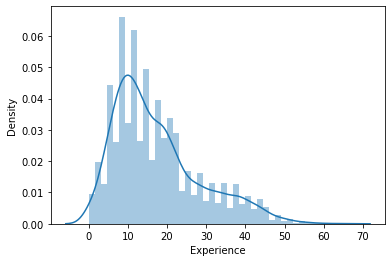

In [141]:
sns.distplot(train_df['Experience'])

data is not equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fees', ylabel='Density'>

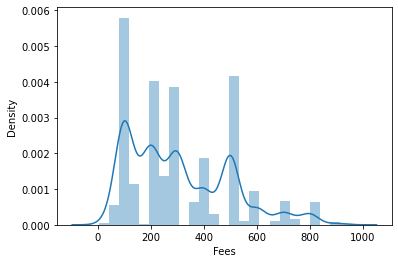

In [142]:

sns.distplot(train_df['Fees'])

data is not equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

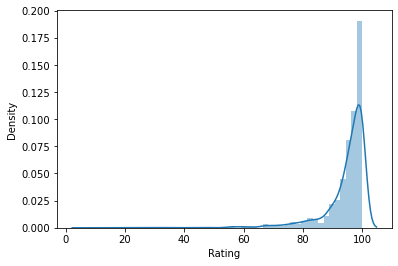

In [143]:
sns.distplot(train_df['Rating'])

data is equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Experience', ylabel='Density'>

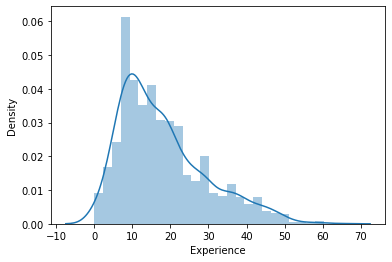

In [144]:
sns.distplot(test_df['Experience'])

data is equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fees', ylabel='Density'>

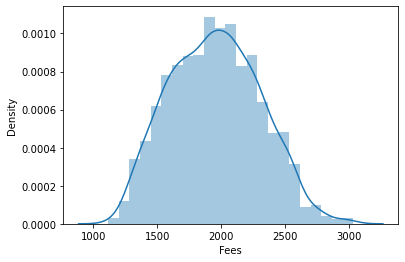

In [145]:
sns.distplot(sub_df['Fees'])

data is equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

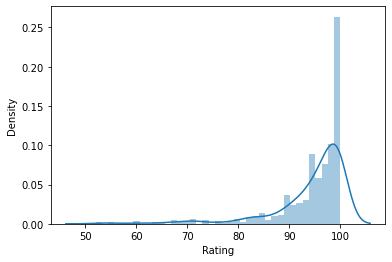

In [146]:
sns.distplot(test_df['Rating'])

data is equally distributed

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience'>

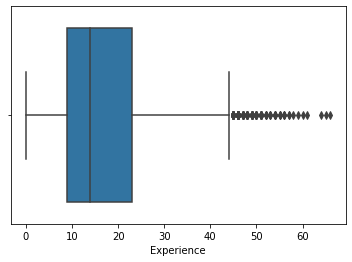

In [147]:
sns.boxplot(train_df['Experience'])

data contains outliers

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

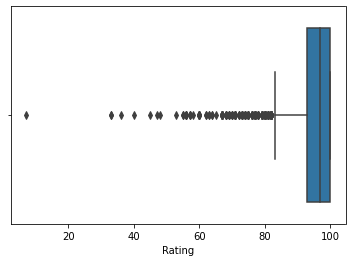

In [148]:
sns.boxplot(train_df['Rating'])

data contains outliers

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fees'>

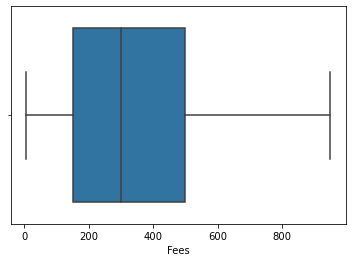

In [149]:
sns.boxplot(train_df['Fees'])

no outlier found

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience'>

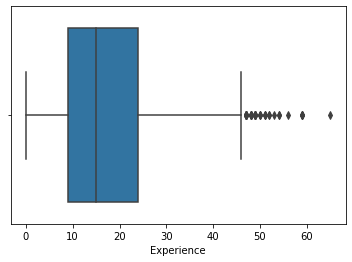

In [150]:
sns.boxplot(test_df['Experience'])

there are outliers

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

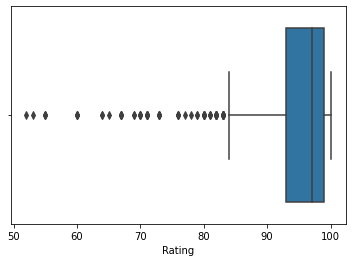

In [151]:
sns.boxplot(test_df['Rating'])

there are outliers

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fees'>

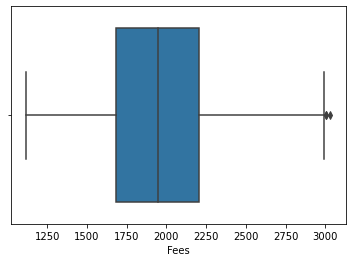

In [152]:
sns.boxplot(sub_df['Fees'])

outliers found

In [153]:
train_df.loc[train_df['City'].isnull(), 'Area'] = 'none'
train_df['City'] = train_df['City'].fillna('none')

In [154]:
train_df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'none'], dtype=object)

in these cities doctors are located

In [155]:
train_df['Area'].nunique()

867

In [156]:
train_df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

in these profiles doctors are available

In [157]:
test_df['Profile'].unique()

array(['General Medicine', 'ENT Specialist', 'Dermatologists', 'Ayurveda',
       'Dentist', 'Homeopath'], dtype=object)

In [158]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,Has_M_Info
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,1
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,1
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,1
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1


C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


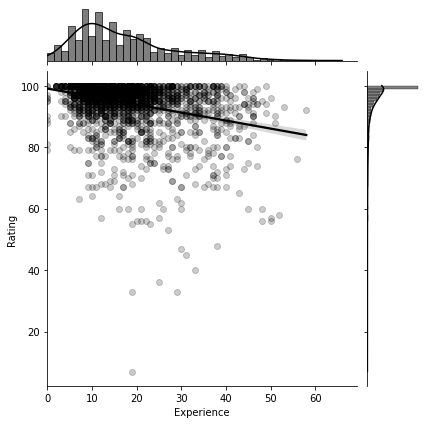

In [159]:
sns.jointplot(train_df['Experience'], train_df['Rating'], color='k', kind="reg", fit_reg=True, joint_kws={'scatter_kws':{"alpha": 0.2}})
plt.show()                                         #bivariate analysis

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


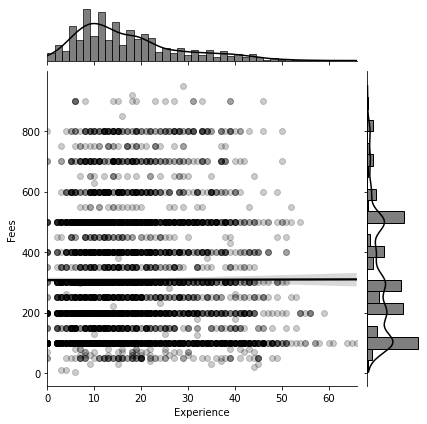

In [160]:
sns.jointplot(train_df['Experience'], train_df['Fees'], color='k', kind="reg", fit_reg=True,joint_kws={'scatter_kws':{"alpha": 0.2}})
plt.show()

data shows that with less experience fees is more

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


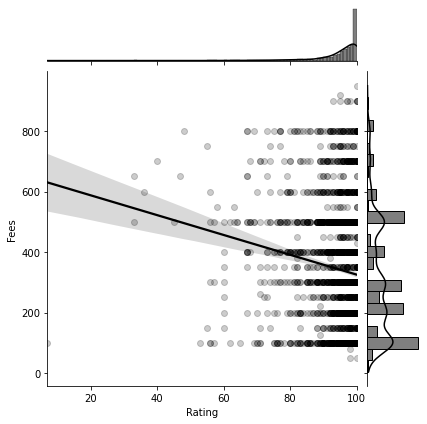

In [161]:
sns.jointplot(train_df['Rating'], train_df['Fees'], color='k', kind="reg", fit_reg=True,joint_kws={'scatter_kws':{"alpha": 0.2}})
plt.show()

straight line formed between rating and fees

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


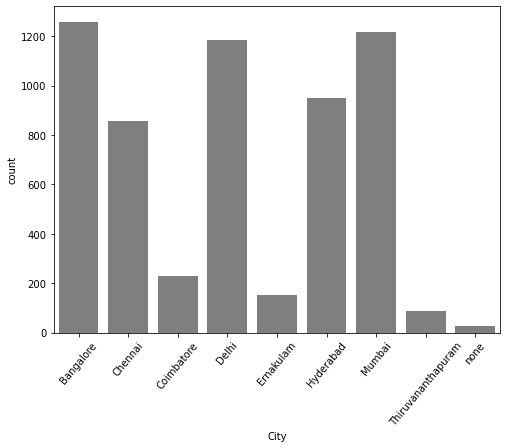

In [162]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(train_df['City'].sort_values(), ax=ax, color='k', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

no of patients count with respective cities

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


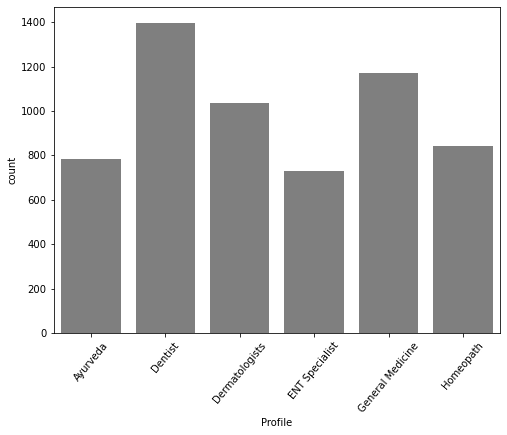

In [163]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(train_df['Profile'].sort_values(), ax=ax, color='k', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

no of patients count with respective profile

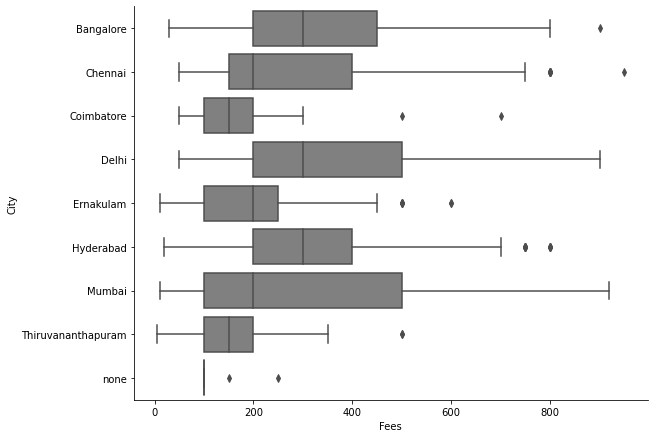

In [164]:
sns.catplot(x='Fees', y='City', data=train_df.sort_values("City"), kind='box', height=6, aspect= 1.5, color='gray')
plt.show()

there are few outliers in data

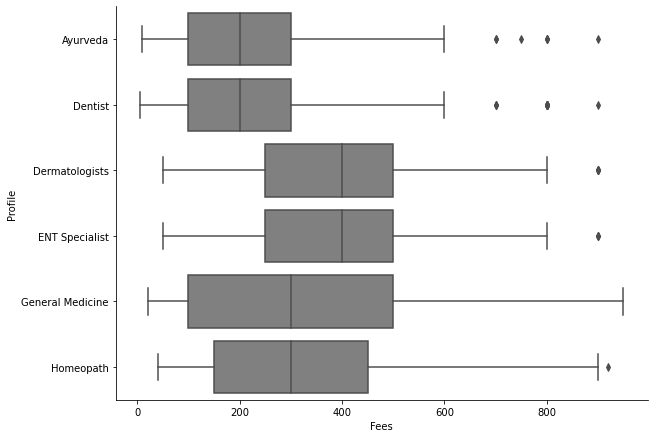

In [165]:
sns.catplot(x='Fees', y='Profile', data=train_df.sort_values("Profile"), kind='box', height=6, aspect= 1.5, color='gray')
plt.show()

there are few outliers in data

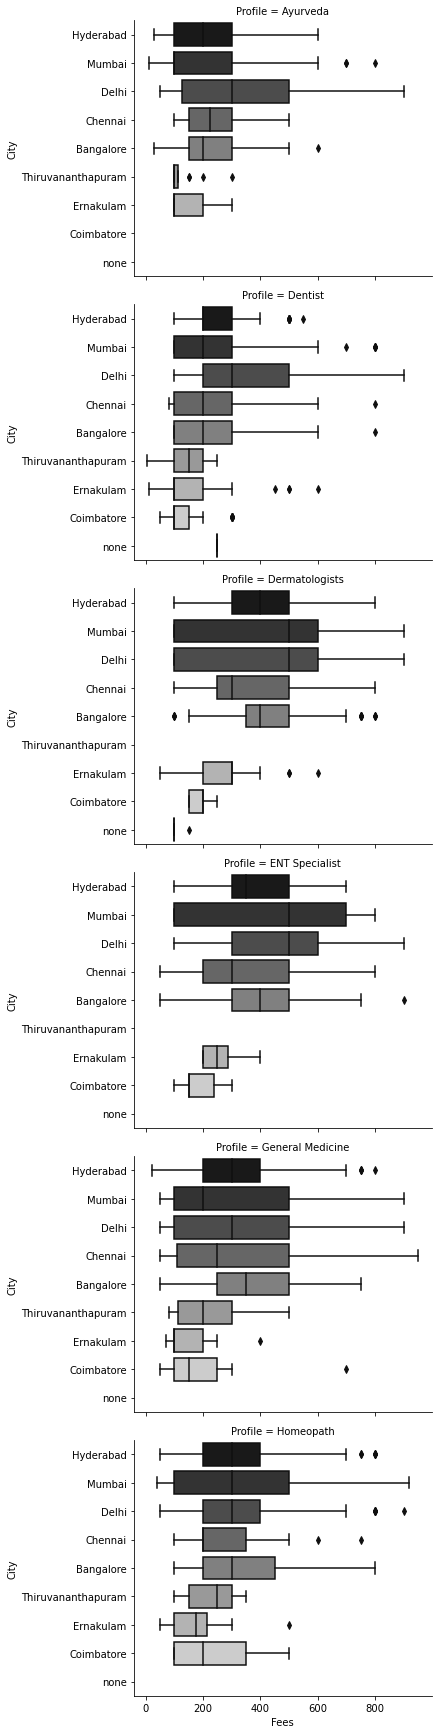

In [166]:
sns.catplot(x='Fees', y='City', row='Profile', data=train_df.sort_values("Profile"), kind='box', height=4, aspect= 1.5, palette="gray")
plt.show()

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWa

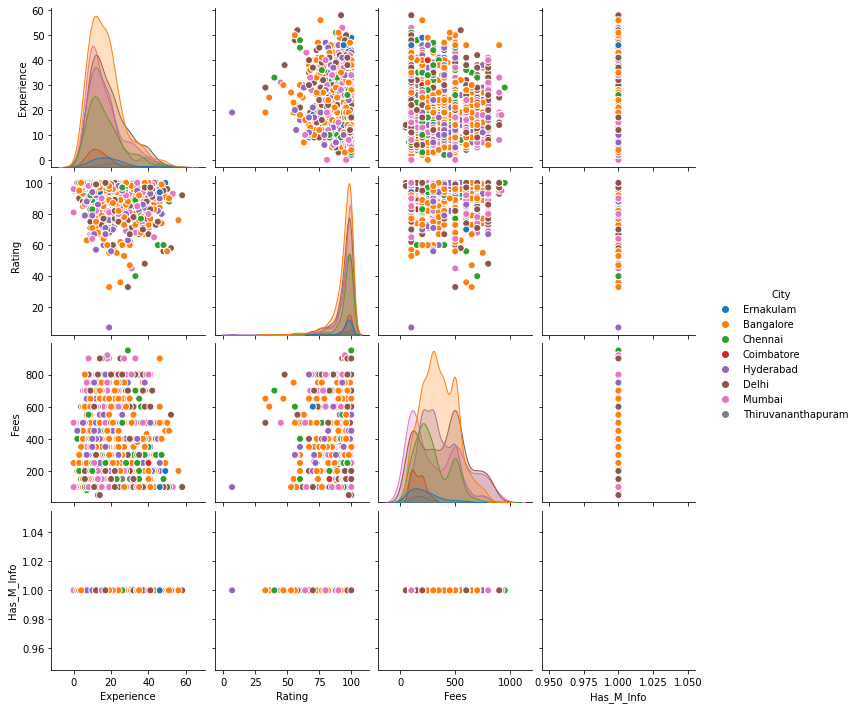

In [167]:
sns.pairplot(train_df.dropna().drop(['Qualification', 'Place', 'Area', 'Miscellaneous_Info'], axis=1), kind="scatter", hue="City", plot_kws=dict(s=50, edgecolor="white", linewidth=1))
plt.show()                   #multivariate analysis

THIS shows the correlation between experience rating n fees

In [168]:
corr_mat=train_df.corr()          #another example of multivariate analysis
corr_mat

,Experience,Rating,Fees,Has_M_Info
Experience,1.000000,-0.313592,0.002117,-0.120359
Rating,-0.313592,1.000000,-0.133572,0.020715
Fees,0.002117,-0.133572,1.000000,0.168466
Has_M_Info,-0.120359,0.020715,0.168466,1.000000


this also shows the correlation between experience, ratings, fees, and has m info

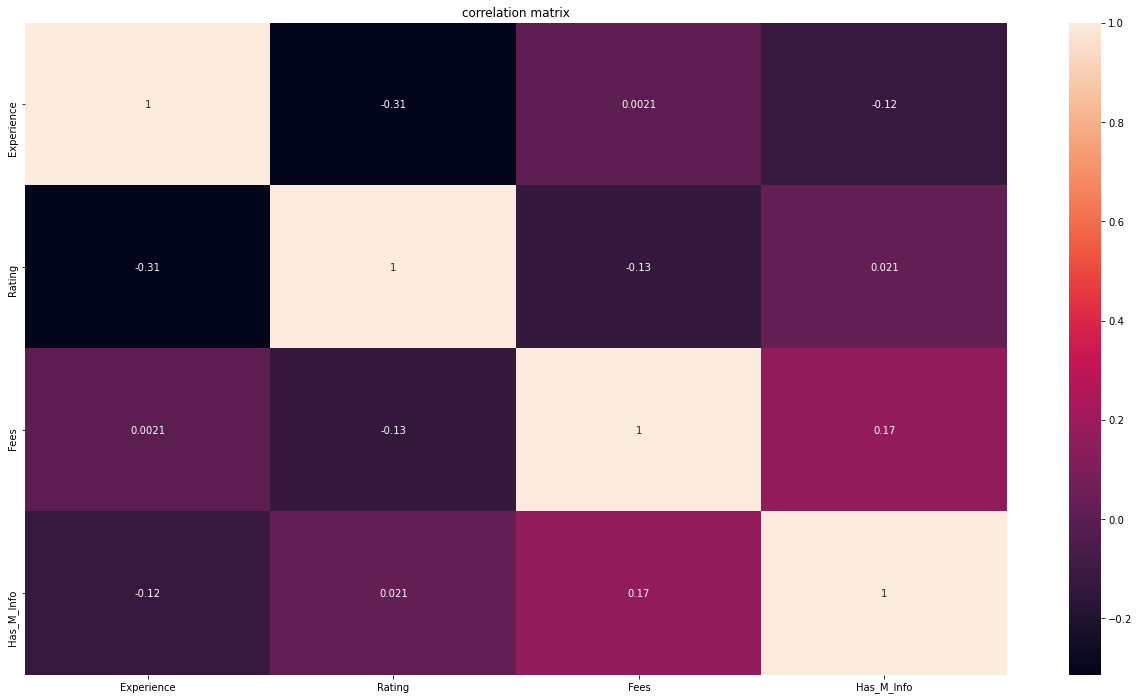

In [169]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title('correlation matrix')
plt.show()

In [170]:
!pip3 install catboost

In [171]:
!pip3 install xgboost

In [172]:
import catboost as cb
import xgboost as xgb

In [173]:
quals = pd.DataFrame(item for item in train_df['Qualification'].str.split(', '))
quals.head()

,0,1,2,3,4,5,6,7,8,9
0,BHMS,MD - Homeopathy,None,None,None,None,None,None,None,None
1,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None,None
2,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None,None
3,BSc - Zoology,BAMS,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None


In [174]:
quals.isnull().sum()

0       0
1    1962
2    4598
3    5592
4    5842
5    5926
6    5949
7    5956
8    5958
9    5960
dtype: int64

In [175]:
for i in range(10):
    print(quals[i].nunique())

151
425
405
209
95
32
12
5
3
1


In [176]:
quals[0].value_counts()

MBBS                                  2448
BDS                                   1208
BAMS                                   711
BHMS                                   706
MD - Dermatology                        84
                                      ... 
Fellowship In Clinical Cosmetology       1
MDS- Oral Pathology                      1
MD - Alternate Medicine                  1
Certificate in Dental Implants           1
DNB - General Surgery                    1
Name: 0, Length: 151, dtype: int64

In [177]:
vecz = TfidfVectorizer(analyzer='word')
vecz.fit(train_df['Qualification'])

TfidfVectorizer()

In [178]:
qual_train = vecz.transform(train_df['Qualification'])
qual_train

<5961x699 sparse matrix of type '<class 'numpy.float64'>'
	with 22663 stored elements in Compressed Sparse Row format>

In [179]:
qual_test = vecz.transform(test_df['Qualification'])
qual_test

<1987x699 sparse matrix of type '<class 'numpy.float64'>'
	with 7799 stored elements in Compressed Sparse Row format>

In [180]:
svd = TruncatedSVD(n_components=20)
svd.fit(qual_train)
print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)

0.7305580677458292
[0.0651461  0.0932571  0.08841786 0.09215534 0.06995137 0.04716524
 0.04335796 0.0386357  0.02726825 0.02072666 0.01942381 0.01691494
 0.01640642 0.01555553 0.01513258 0.01454686 0.01366489 0.01325777
 0.01008408 0.0094896 ]


In [181]:
qual_train = svd.transform(qual_train)
qual_train = pd.DataFrame(qual_train, columns=['svd_{}'.format(i) for i in range(20)])
train_df = pd.concat((train_df, qual_train), axis=1)
qual_test = svd.transform(qual_test)
qual_test = pd.DataFrame(qual_test, columns=['svd_{}'.format(i) for i in range(20)])
test_df = pd.concat((test_df, qual_test), axis=1)

In [182]:
show_all(train_df.head())

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,Has_M_Info,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,svd_18,svd_19
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,1,0.204698,-0.004905,0.617614,-0.094015,-0.160937,0.038923,-0.176068,-0.056247,-0.029596,0.469660,0.178301,0.227177,-0.325472,0.006792,-0.233820,0.164187,0.075268,-0.023640,0.000892,-0.029706
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,1,0.268381,-0.001537,0.122677,0.555758,-0.217448,0.304366,-0.322422,-0.039006,-0.031482,0.040157,0.082558,0.054600,0.101377,-0.115299,0.429621,0.089272,0.199154,-0.232423,-0.001015,-0.092626
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,0,0.421921,-0.009890,-0.076033,-0.047997,0.483719,-0.076854,-0.143327,0.128527,-0.047774,0.046831,-0.042412,0.289316,-0.147332,-0.029933,0.268629,-0.187987,-0.286576,0.069627,-0.126741,0.002277
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,1,0.019226,0.000641,0.042800,0.252416,0.020670,-0.017922,0.022171,0.001428,0.001324,-0.001620,-0.003270,-0.002049,-0.004656,0.004887,-0.017892,-0.002699,-0.006753,0.007456,-0.002496,0.005261
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,1,0.073281,0.000587,0.162586,0.970117,0.079316,-0.069387,0.087409,0.000966,0.004394,-0.007644,-0.014114,-0.001964,-0.017869,0.022028,-0.063623,-0.018411,-0.026633,0.031912,0.002633,0.016254


In [183]:
features = [col for col in test_df.columns if col not in ['Qualification', 'Place', 'Miscellaneous_Info', 'Area']]
features

['Experience',
 'Rating',
 'Profile',
 'City',
 'Has_M_Info',
 'svd_0',
 'svd_1',
 'svd_2',
 'svd_3',
 'svd_4',
 'svd_5',
 'svd_6',
 'svd_7',
 'svd_8',
 'svd_9',
 'svd_10',
 'svd_11',
 'svd_12',
 'svd_13',
 'svd_14',
 'svd_15',
 'svd_16',
 'svd_17',
 'svd_18',
 'svd_19']

In [184]:
cat_inds = [2,3,4]
[features[i] for i in cat_inds]

['Profile', 'City', 'Has_M_Info']

In [185]:
def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

In [186]:
def run_cv_model(train, target, model_fn, params={}, n_repeats=1, n_splits=5, test=None, eval_fn=None, label='model', cv_verbose = False, model_verbose=False):
    kf = RepeatedKFold(n_splits=n_splits, random_state=42, n_repeats = n_repeats)
    fold_splits = kf.split(train, target)
    cv_scores = []
    rmsle_scores = []
    pred_full_test = np.zeros((test.shape[0], n_splits*n_repeats))
    pred_train = np.zeros((train.shape[0], n_splits*n_repeats))
    feature_importance_df = pd.DataFrame()
    i = 1
    for dev_index, val_index in fold_splits:
        if cv_verbose:
            print('Started ' + label + ' fold ' + str(i) + '/'+str(n_splits*n_repeats))
        if isinstance(train, pd.DataFrame):
            dev_X, val_X = train.iloc[dev_index], train.iloc[val_index]
            dev_y, val_y = target[dev_index], target[val_index]
        else:
            dev_X, val_X = train[dev_index], train[val_index]
            dev_y, val_y = target[dev_index], target[val_index]
        params2 = params.copy()
        pred_val_y, pred_test_y, importances, rmsle = model_fn(dev_X, dev_y, val_X, val_y, test, params2, model_verbose)
        pred_full_test[:, i-1] = pred_test_y.flatten()
        pred_train[val_index] = pred_val_y
        if eval_fn is not None:
            cv_score = eval_fn(val_y, pred_val_y)
            cv_scores.append(cv_score)
            rmsle_scores.append(rmsle)
            if cv_verbose:
                print(label + ' cv score {}: RMSE {}, RMSLE {}'.format(i, cv_score, rmsle))
        fold_importance_df = pd.DataFrame()
        fold_importance_df['feature'] = train.columns.values
        fold_importance_df['importance'] = importances
        fold_importance_df['fold'] = i
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)        
        i += 1
    
    if cv_verbose:
        print("\n\n CV - Report\n")
        print('{} cv RMSE scores : {}'.format(label, cv_scores))
        print('{} cv mean RMSE score : {}'.format(label, np.mean(cv_scores)))
        print('{} cv std RMSE score : {}'.format(label, np.std(cv_scores)))
        print('{} cv RMSLE scores : {}'.format(label, rmsle_scores))
        print('{} cv mean RMSLE score : {}'.format(label, np.mean(rmsle_scores)))
        print('{} cv std RMSLE score : {}'.format(label, np.std(rmsle_scores)))
    results = {'label': label,
               'train': pred_train, 'test': pred_full_test,
                'cv': cv_scores, 'rmsle': rmsle_scores,
               'importance': feature_importance_df}
    return results

In [187]:
def runCatBoostReg(train_X, train_y, test_X, test_y, test_X2, params, model_verbose):
    if model_verbose:
        print('Prep Catboost Regressor')
    cat_ind = params.pop('cat_features')
    val_pool = cb.Pool(test_X.values, test_y.values, cat_features=cat_ind)
    model = cb.CatBoostRegressor()
    model.set_params(** params)
    if model_verbose:
        print('Train Catboost Regressor')
    model.fit(X=train_X, y=train_y, eval_set=val_pool, cat_features=cat_ind, use_best_model=True)
    
    if model_verbose:
        print('Predict validation set')
    pred_test_y = model.predict(test_X)
    rmsle = np.sqrt(mean_squared_log_error(test_y, pred_test_y))
    if model_verbose:
        print('Predict actual test set')
    if test_X2 is not None:
        pred_test_y2 = model.predict(test_X2)
        pred_test_y2 = pred_test_y2.reshape(-1, 1)
    else:
        pred_test_y2 = 0
    pred_test_y = pred_test_y.reshape(-1, 1)
    return pred_test_y, pred_test_y2, model.feature_importances_, rmsle

In [188]:
catboost_params = {'iterations': 10000,
                   'learning_rate': 0.06,
                   'depth': 8,
                   'loss_function': 'RMSE',
                   'eval_metric': 'RMSE',
                   'random_seed': 2018,
                   'l2_leaf_reg': 3,
                   'early_stopping_rounds': 400,
                   'use_best_model': True,
                   'verbose': 100,
                   'cat_features': cat_inds}

In [189]:
results = run_cv_model(train_df[features], train_df['Fees'], runCatBoostReg, catboost_params, n_repeats=1, n_splits=5, test=test_df[features], eval_fn=rmse, label='CatBoost', cv_verbose=True, model_verbose=True)

Started CatBoost fold 1/5
Prep Catboost Regressor
Train Catboost Regressor
0:	learn: 190.1961309	test: 183.7933859	best: 183.7933859 (0)	total: 238ms	remaining: 39m 42s
100:	learn: 154.9369784	test: 163.4320812	best: 163.2344530 (62)	total: 5.21s	remaining: 8m 30s
200:	learn: 146.6699039	test: 164.1370934	best: 163.2344530 (62)	total: 10.5s	remaining: 8m 30s
300:	learn: 139.8369244	test: 165.0484720	best: 163.2344530 (62)	total: 15.5s	remaining: 8m 20s
400:	learn: 134.0883905	test: 166.1100639	best: 163.2344530 (62)	total: 20.6s	remaining: 8m 13s
Stopped by overfitting detector  (400 iterations wait)

bestTest = 163.234453
bestIteration = 62

Shrink model to first 63 iterations.
Predict validation set
Predict actual test set
CatBoost cv score 1: RMSE 163.23445296909622, RMSLE 0.6053674283112972
Started CatBoost fold 2/5
Prep Catboost Regressor
Train Catboost Regressor
0:	learn: 187.6725093	test: 193.7664566	best: 193.7664566 (0)	total: 86.2ms	remaining: 14m 22s
100:	learn: 154.5843048	

In [190]:
imports = results['importance'].groupby('feature')['feature', 'importance'].mean().reset_index()
show_all(imports.sort_values('importance', ascending=False).reset_index(drop=True))

<ipython-input-190-979fe38fe2df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  imports = results['importance'].groupby('feature')['feature', 'importance'].mean().reset_index()


,feature,importance
0,City,17.314031
1,Experience,9.867975
2,Profile,9.727391
3,Has_M_Info,9.109173
4,svd_0,8.687010
5,Rating,3.926596
6,svd_1,3.324684
7,svd_6,2.777271
8,svd_5,2.774932
9,svd_2,2.659646


C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


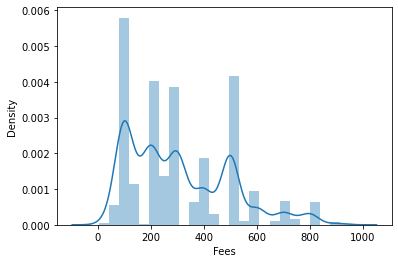

In [88]:
# Acctual target
sns.distplot(train_df['Fees'])
plt.show()

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


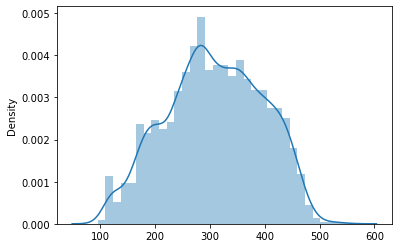

In [191]:
# predicted target
sns.distplot(results['train'][:, 0])
plt.show()

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


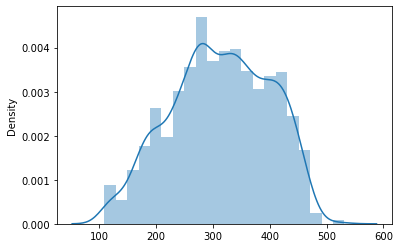

In [192]:
# Test target
sns.distplot(np.mean(results['test'], axis=1))
plt.show()

In [195]:
sub_df['Fees'] = np.mean(results['test'], axis=1)
sub_df.head()

,Fees
0,220.386407
1,273.215337
2,364.828603
3,219.494104
4,282.588017


In [196]:
import joblib
joblib.dump(results,'finalmodle.pkl')

['finalmodle.pkl']